In [47]:
#Suppressing all warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('Churn_Modelling.csv')
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [3]:
data.drop('RowNumber',axis=1)

CustomerId    Surname  CreditScore Geography  Gender  Age  Tenure  \
0       15634602   Hargrave          619    France  Female   42       2   
1       15647311       Hill          608     Spain  Female   41       1   
2       15619304       Onio          502    France  Female   42       8   
3       15701354       Boni          699    France  Female   39       1   
4       15737888   Mitchell          850     Spain  Female   43       2   
...          ...        ...          ...       ...     ...  ...     ...   
9995    15606229   Obijiaku          771    France    Male   39       5   
9996    15569892  Johnstone          516    France    Male   35      10   
9997    15584532        Liu          709    France  Female   36       7   
9998    15682355  Sabbatini          772   Germany    Male   42       3   
9999    15628319     Walker          792    France  Female   28       4   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0          0.00              1          1               1        101348.88   
1      83807.86              1          0               1        112542.58   
2     159660.80              3          1               0        113931.57   
3          0.00              2          0               0         93826.63   
4     125510.82              1          1               1         79084.10   
...         ...            ...        ...             ...              ...   
9995       0.00              2          1               0         96270.64   
9996   57369.61              1          1               1        101699.77   
9997       0.00              1          0               1         42085.58   
9998   75075.31              2          1               0         92888.52   
9999  130142.79              1          1               0         38190.78   

      Exited  
0          1  
1          0  
2          1  
3          0  
4          0  
...      ...  
9995       0  
9996       0  
9997       1  
9998       1  
9999       0  

[10000 rows x 13 columns]

In [4]:
# Checking For Null Values

In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data.shape

(10000, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
data.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [9]:
# EDA

In [10]:
help(px.box)

Help on function box in module plotly.express._chart_types:

box(data_frame=None, x=None, y=None, color=None, facet_row=None, facet_col=None, facet_col_wrap=0, facet_row_spacing=None, facet_col_spacing=None, hover_name=None, hover_data=None, custom_data=None, animation_frame=None, animation_group=None, category_orders={}, labels={}, color_discrete_sequence=None, color_discrete_map={}, orientation=None, boxmode=None, log_x=False, log_y=False, range_x=None, range_y=None, points=None, notched=False, title=None, template=None, width=None, height=None)
        In a box plot, rows of `data_frame` are grouped together into a
        box-and-whisker mark to visualize their distribution.
    
        Each box spans from quartile 1 (Q1) to quartile 3 (Q3). The second
        quartile (Q2) is marked by a line inside the box. By default, the
        whiskers correspond to the box' edges +/- 1.5 times the interquartile
        range (IQR: Q3-Q1), see "points" for other options.
        
    Paramet

In [11]:
fig=px.pie(data,names='Exited',)
fig.show()

In [12]:
fig=px.pie(data,names='Gender',hole=0.5)
fig.show()

In [13]:
fig=px.histogram(data,x='Age')
fig.show()

In [14]:
fig=px.histogram(data,x='Balance')
fig.show()

In [15]:
fig=px.histogram(data,x='HasCrCard')
fig.show()

In [16]:
fig=px.histogram(data,x='IsActiveMember')
fig.show()

In [17]:
fig=px.histogram(data,x='EstimatedSalary')
fig.show()

In [18]:
fig=px.histogram(data,x='CreditScore')
fig.show()

In [19]:
fig=px.bar(data,x='Age',y='Exited',template='plotly_dark')
fig.show()

In [20]:
fig=px.bar(data,x='CreditScore',y='Exited',template='plotly_dark')
fig.show()

In [21]:
fig=px.bar(data,x='IsActiveMember',y='HasCrCard',template='plotly_dark')
fig.show()

In [31]:
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [22]:
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [24]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [25]:
df=data.copy()

In [26]:
df=df.drop(['RowNumber','Surname'],axis=1)

In [27]:
df.head()

CustomerId  CreditScore Geography  Gender  Age  Tenure    Balance  \
0    15634602          619    France  Female   42       2       0.00   
1    15647311          608     Spain  Female   41       1   83807.86   
2    15619304          502    France  Female   42       8  159660.80   
3    15701354          699    France  Female   39       1       0.00   
4    15737888          850     Spain  Female   43       2  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0              1          1               1        101348.88       1  
1              1          0               1        112542.58       0  
2              3          1               0        113931.57       1  
3              2          0               0         93826.63       0  
4              1          1               1         79084.10       0

In [29]:
dummy=pd.get_dummies(df[['Geography','Gender']],drop_first=True)
df=pd.concat([df,dummy],axis=1)
df

CustomerId  CreditScore Geography  Gender  Age  Tenure    Balance  \
0       15634602          619    France  Female   42       2       0.00   
1       15647311          608     Spain  Female   41       1   83807.86   
2       15619304          502    France  Female   42       8  159660.80   
3       15701354          699    France  Female   39       1       0.00   
4       15737888          850     Spain  Female   43       2  125510.82   
...          ...          ...       ...     ...  ...     ...        ...   
9995    15606229          771    France    Male   39       5       0.00   
9996    15569892          516    France    Male   35      10   57369.61   
9997    15584532          709    France  Female   36       7       0.00   
9998    15682355          772   Germany    Male   42       3   75075.31   
9999    15628319          792    France  Female   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0                 1          1               1        101348.88       1   
1                 1          0               1        112542.58       0   
2                 3          1               0        113931.57       1   
3                 2          0               0         93826.63       0   
4                 1          1               1         79084.10       0   
...             ...        ...             ...              ...     ...   
9995              2          1               0         96270.64       0   
9996              1          1               1        101699.77       0   
9997              1          0               1         42085.58       1   
9998              2          1               0         92888.52       1   
9999              1          1               0         38190.78       0   

      Geography_Germany  Geography_Spain  Gender_Male  
0                     0                0            0  
1                     0                1            0  
2                     0                0            0  
3                     0                0            0  
4                     0                1            0  
...                 ...              ...          ...  
9995                  0                0            1  
9996                  0                0            1  
9997                  0                0            0  
9998                  1                0            1  
9999                  0                0            0  

[10000 rows x 15 columns]

In [30]:
df=df.drop(['Geography','Gender'],axis=1)

In [31]:
df.head()

CustomerId  CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0    15634602          619   42       2       0.00              1          1   
1    15647311          608   41       1   83807.86              1          0   
2    15619304          502   42       8  159660.80              3          1   
3    15701354          699   39       1       0.00              2          0   
4    15737888          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1                  0   
1               1        112542.58       0                  0   
2               0        113931.57       1                  0   
3               0         93826.63       0                  0   
4               1         79084.10       0                  0   

   Geography_Spain  Gender_Male  
0                0            0  
1                1            0  
2                0            0  
3                0            0  
4                1            0

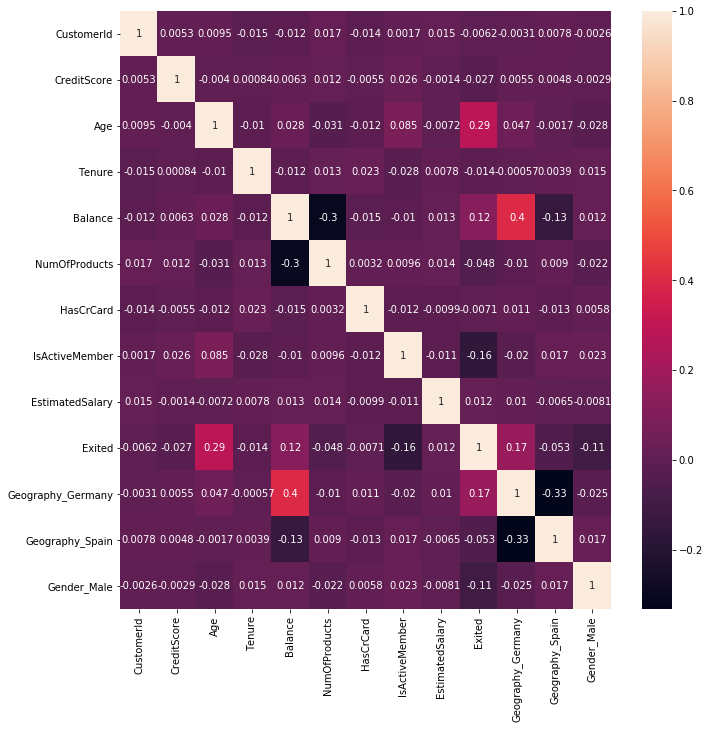

In [38]:
f, ax = plt.subplots(figsize=(11, 11)) 
sns.heatmap(df.corr(),annot=True)

In [39]:
df.columns

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Geography_Germany', 'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [40]:
X = df[['CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
        'Geography_Germany', 'Geography_Spain', 'Gender_Male']]
y = df['Exited']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((7000, 11), (3000, 11))

In [48]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [49]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Not exited', "Exited"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [50]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3)

In [53]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [55]:
sample_tree = rf.estimators_[0]

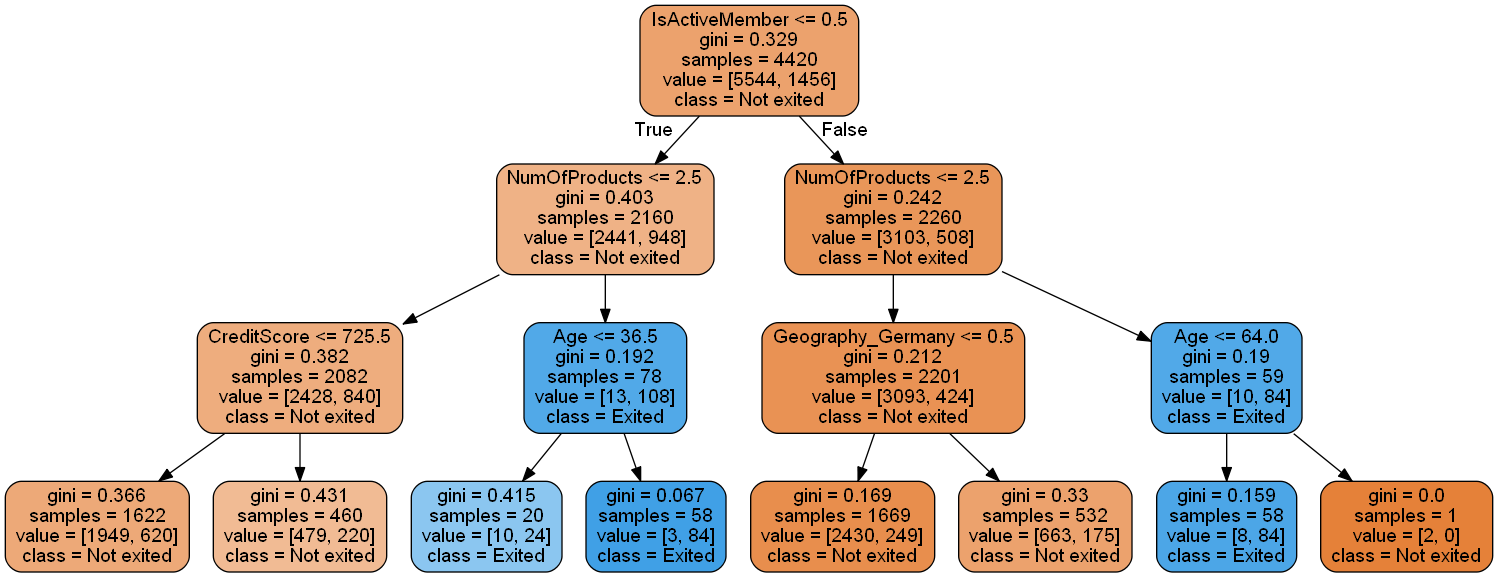

In [56]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png(), width=700, height=700)

In [59]:
evaluate_model(rf)

Train Accuracy : 0.8184285714285714
Train Confusion Matrix:
[[5533   14]
 [1257  196]]
--------------------------------------------------
Test Accuracy : 0.83
Test Confusion Matrix:
[[2404   12]
 [ 498   86]]


### Grid search for hyper-parameter tuning

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [63]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [64]:
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [66]:
%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  5.0min finished


Wall time: 5min 1s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=42,
                                    

In [67]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [68]:
evaluate_model(rf_best)

Train Accuracy : 0.8905714285714286
Train Confusion Matrix:
[[5442  105]
 [ 661  792]]
--------------------------------------------------
Test Accuracy : 0.8686666666666667
Test Confusion Matrix:
[[2340   76]
 [ 318  266]]


In [71]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
1                 Age  0.327635
4       NumOfProducts  0.239694
3             Balance  0.111414
6      IsActiveMember  0.073618
0         CreditScore  0.068578
7     EstimatedSalary  0.064566
8   Geography_Germany  0.045113
2              Tenure  0.036337
10        Gender_Male  0.017152
9     Geography_Spain  0.008271
5           HasCrCard  0.007623

In [79]:
import lime
from lime import lime_tabular

interpretor=lime_tabular.LimeTabularExplainer(
   training_data=np.array(X_train),
feature_names=X_train.columns,
mode='classification')

In [89]:
exp=interpretor.explain_instance(
    data_row=X_test.iloc[10],
    predict_fn=rf_best.predict_proba
)
exp.show_in_notebook(show_table=True)

In [93]:
import pickle

In [96]:
with open('HDClassifierRF.pkl','wb')as pickle_file:
    pickle.dump(rf_best,pickle_file)